# Messi vs Ronaldo 2009 to 2018



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as la

In [7]:
leocr =pd.read_csv('MessiRonaldo.csv')
leocr.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170
2,2016-17,Messi,37,9,34,2832,11,2,9,810
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200
4,2015-16,Messi,26,16,33,2729,6,1,7,630


In [8]:
leocr.shape

(18, 10)

In [9]:
leocr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      18 non-null     object
 1   Player      18 non-null     object
 2   Liga_Goals  18 non-null     int64 
 3   Liga_Asts   18 non-null     int64 
 4   Liga_Aps    18 non-null     int64 
 5   Liga_Mins   18 non-null     int64 
 6   CL_Goals    18 non-null     int64 
 7   CL_Asts     18 non-null     int64 
 8   CL_Aps      18 non-null     int64 
 9   CL_Mins     18 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ KB


In [10]:
leocr.isnull().sum()

Season        0
Player        0
Liga_Goals    0
Liga_Asts     0
Liga_Aps      0
Liga_Mins     0
CL_Goals      0
CL_Asts       0
CL_Aps        0
CL_Mins       0
dtype: int64

In [11]:
leocr.columns

Index(['Season', 'Player', 'Liga_Goals', 'Liga_Asts', 'Liga_Aps', 'Liga_Mins',
       'CL_Goals', 'CL_Asts', 'CL_Aps', 'CL_Mins'],
      dtype='object')

In [18]:
leocr['Mins/Liga_Goals'] = leocr['Liga_Mins'] / leocr['Liga_Goals']
leocr['Mins/Liga_Asts'] = leocr['Liga_Mins'] / leocr['Liga_Asts']
leocr['Mins/Liga_Aps'] = leocr['Liga_Mins'] / leocr['Liga_Aps']

# Additional calculations with other columns
leocr['Mins/CL_Goals'] = leocr['CL_Mins'] / leocr['CL_Goals']
leocr['Mins/CL_Asts'] = leocr['CL_Mins'] / leocr['CL_Asts']
leocr['Mins/CL_Aps'] = leocr['CL_Mins'] / leocr['CL_Aps']



In [19]:
leocr.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Mins/Liga_Goals,Mins/Liga_Asts,Mins/Liga_Aps,Mins/CL_Goals,Mins/CL_Asts,Mins/CL_Aps
0,2017-18,Messi,34,12,36,2996,6,2,10,783,88.117647,249.666667,83.222222,130.500000,391.5,78.300000
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,88.346154,459.400000,85.074074,78.000000,390.0,90.000000
2,2016-17,Messi,37,9,34,2832,11,2,9,810,76.540541,314.666667,83.294118,73.636364,405.0,90.000000
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,101.760000,424.000000,87.724138,100.000000,240.0,92.307692
4,2015-16,Messi,26,16,33,2729,6,1,7,630,104.961538,170.562500,82.696970,105.000000,630.0,90.000000


In [20]:
leocr.shape

(18, 16)

In [21]:
leocr['lg_rank'] = [1,3,2,1,1,2,1,2,2,3,1,2,2,1,1,2,1,2]
leocr['cl_rank'] = [5,1,5,1,5,1,1,4,5,1,4,4,4,4,1,4,4,5]

In [22]:
leocr.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Mins/Liga_Goals,Mins/Liga_Asts,Mins/Liga_Aps,Mins/CL_Goals,Mins/CL_Asts,Mins/CL_Aps,lg_rank,cl_rank
0,2017-18,Messi,34,12,36,2996,6,2,10,783,88.117647,249.666667,83.222222,130.500000,391.5,78.300000,1,5
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,88.346154,459.400000,85.074074,78.000000,390.0,90.000000,3,1
2,2016-17,Messi,37,9,34,2832,11,2,9,810,76.540541,314.666667,83.294118,73.636364,405.0,90.000000,2,5
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,101.760000,424.000000,87.724138,100.000000,240.0,92.307692,1,1
4,2015-16,Messi,26,16,33,2729,6,1,7,630,104.961538,170.562500,82.696970,105.000000,630.0,90.000000,1,5


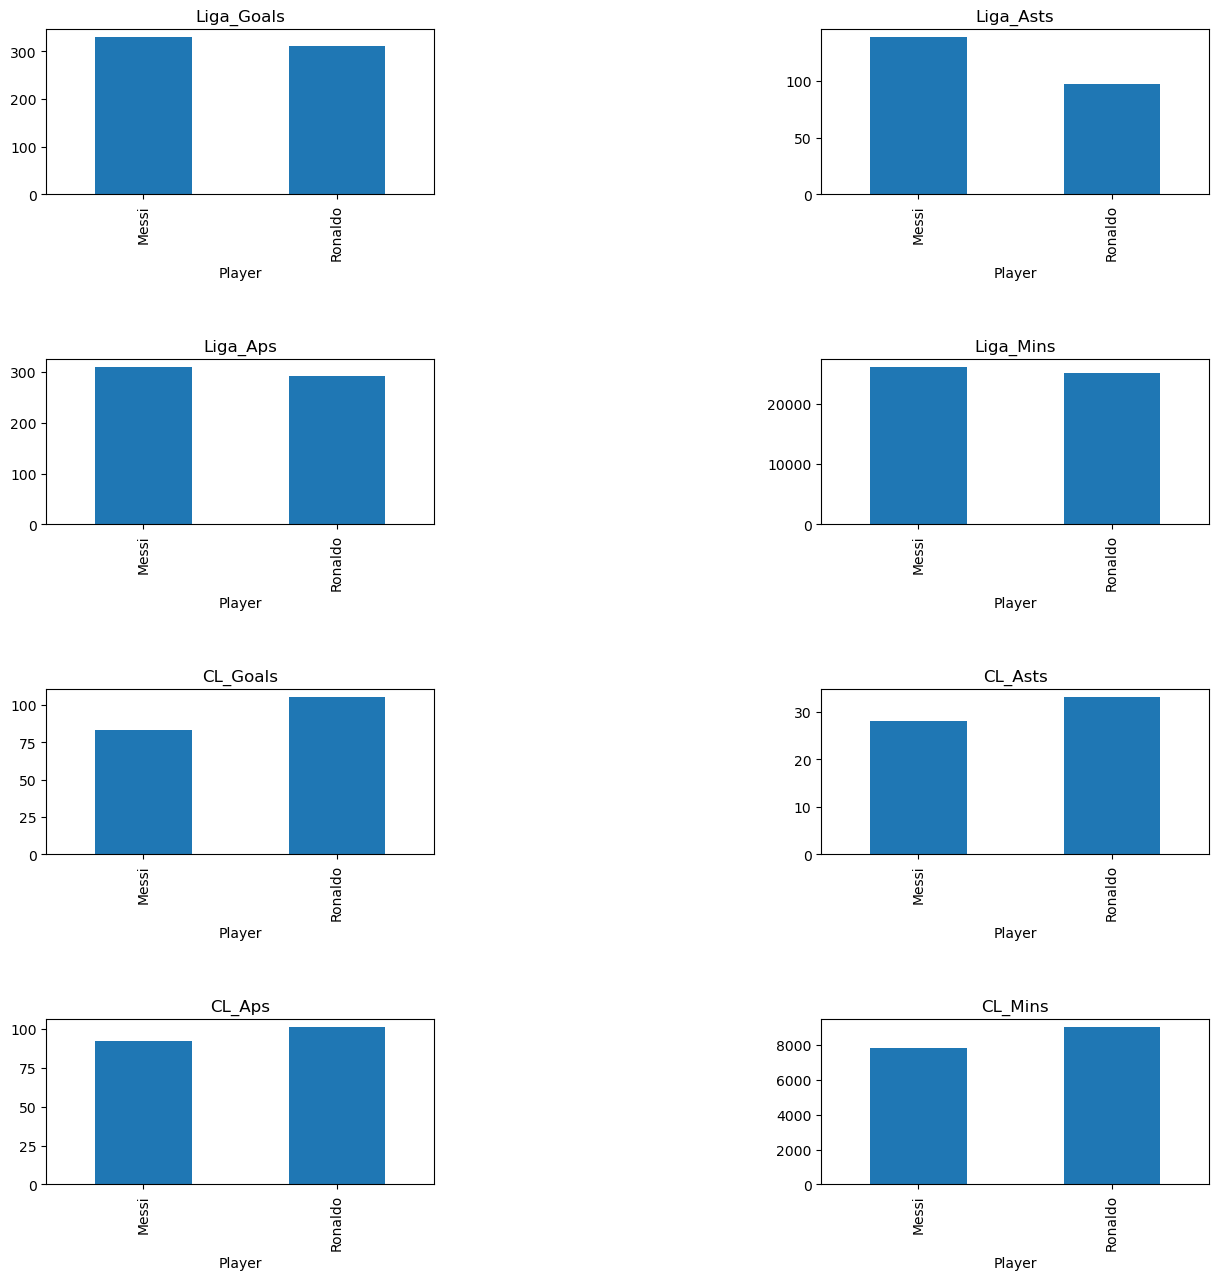

In [24]:
##visualizasion to compare performance of both players by different features
plt.figure(figsize=(15,15))
plt.subplot(421)
leocr.groupby('Player')['Liga_Goals'].sum().plot.bar()
plt.title('Liga_Goals')

plt.subplot(422)
leocr.groupby('Player')['Liga_Asts'].sum().plot.bar()
plt.title('Liga_Asts')

plt.subplot(423)
leocr.groupby('Player')['Liga_Aps'].sum().plot.bar()
plt.title('Liga_Aps')

plt.subplot(424)
leocr.groupby('Player')['Liga_Mins'].sum().plot.bar()
plt.title('Liga_Mins')

plt.subplot(425)
leocr.groupby('Player')['CL_Goals'].sum().plot.bar()
plt.title('CL_Goals')

plt.subplot(426)
leocr.groupby('Player')['CL_Asts'].sum().plot.bar()
plt.title('CL_Asts')

plt.subplot(427)
leocr.groupby('Player')['CL_Aps'].sum().plot.bar()
plt.title('CL_Aps')

plt.subplot(428)
leocr.groupby('Player')['CL_Mins'].sum().plot.bar()
plt.title('CL_Mins')

plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)

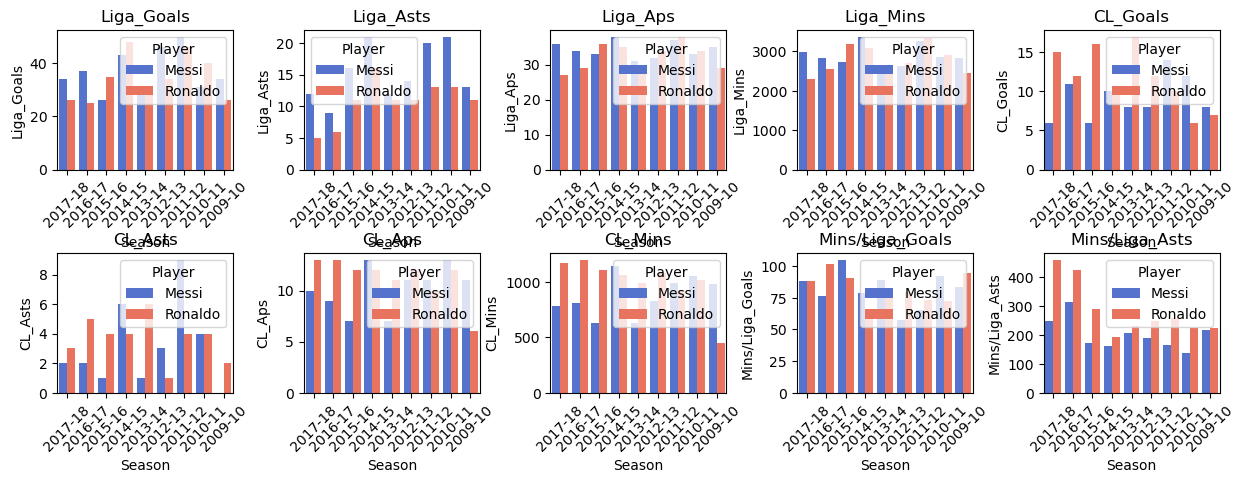

In [39]:
plt.figure(figsize=(15, 25))  # Adjust the figure size to ensure clearer graphs

plt.subplot(9, 5, 1)
sns.barplot(data=leocr, x='Season', y='Liga_Goals', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Liga_Goals', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 2)
sns.barplot(data=leocr, x='Season', y='Liga_Asts', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Liga_Asts', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 3)
sns.barplot(data=leocr, x='Season', y='Liga_Aps', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Liga_Aps', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 4)
sns.barplot(data=leocr, x='Season', y='Liga_Mins', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Liga_Mins', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 5)
sns.barplot(data=leocr, x='Season', y='CL_Goals', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('CL_Goals', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 6)
sns.barplot(data=leocr, x='Season', y='CL_Asts', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('CL_Asts', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 7)
sns.barplot(data=leocr, x='Season', y='CL_Aps', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('CL_Aps', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 8)
sns.barplot(data=leocr, x='Season', y='CL_Mins', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('CL_Mins', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 9)
sns.barplot(data=leocr, x='Season', y='Mins/Liga_Goals', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Mins/Liga_Goals', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(9, 5, 10)
sns.barplot(data=leocr, x='Season', y='Mins/Liga_Asts', hue='Player', palette={'Messi': 'royalblue', 'Ronaldo': 'tomato'})
plt.title('Mins/Liga_Asts', fontsize=12)
plt.xticks(rotation=45)

# Repeat the above pattern for the remaining subplots by following the same structure for plt.subplot()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [40]:
df_messi = [leocr['Player']=='Messi']
df_ronaldo = [leocr['Player']=='Ronaldo']

In [43]:
df_messi

[0      True
 1     False
 2      True
 3     False
 4      True
 5     False
 6      True
 7     False
 8      True
 9     False
 10     True
 11    False
 12     True
 13    False
 14     True
 15    False
 16     True
 17    False
 Name: Player, dtype: bool]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Player,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True


,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Mins/Liga_Goals,Mins/Liga_Asts,Mins/Liga_Aps,Mins/CL_Goals,Mins/CL_Asts,Mins/CL_Aps,lg_rank,cl_rank
0,2017-18,Messi,34,12,36,2996,6,2,10,783,88.117647,249.666667,83.222222,130.500000,391.5,78.300000,1,5
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,88.346154,459.400000,85.074074,78.000000,390.0,90.000000,3,1
2,2016-17,Messi,37,9,34,2832,11,2,9,810,76.540541,314.666667,83.294118,73.636364,405.0,90.000000,2,5
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,101.760000,424.000000,87.724138,100.000000,240.0,92.307692,1,1
4,2015-16,Messi,26,16,33,2729,6,1,7,630,104.961538,170.562500,82.696970,105.000000,630.0,90.000000,1,5


In [52]:
df_messi = leocr[leocr['Player']=='Messi']
df_ronaldo = leocr[leocr['Player']=='Ronaldo']

In [53]:
df_messi

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Mins/Liga_Goals,Mins/Liga_Asts,Mins/Liga_Aps,Mins/CL_Goals,Mins/CL_Asts,Mins/CL_Aps,lg_rank,cl_rank
0,2017-18,Messi,34,12,36,2996,6,2,10,783,88.117647,249.666667,83.222222,130.500000,391.500000,78.300000,1,5
2,2016-17,Messi,37,9,34,2832,11,2,9,810,76.540541,314.666667,83.294118,73.636364,405.000000,90.000000,2,5
4,2015-16,Messi,26,16,33,2729,6,1,7,630,104.961538,170.562500,82.696970,105.000000,630.000000,90.000000,1,5
6,2014-15,Messi,43,21,38,3375,10,6,13,1145,78.488372,160.714286,88.815789,114.500000,190.833333,88.076923,1,1
8,2013-14,Messi,28,12,31,2498,8,1,7,630,89.214286,208.166667,80.580645,78.750000,630.000000,90.000000,2,5
10,2012-13,Messi,46,14,32,2629,8,3,11,827,57.152174,187.785714,82.156250,103.375000,275.666667,75.181818,1,4
12,2011-12,Messi,50,20,37,3270,14,9,11,990,65.400000,163.500000,88.378378,70.714286,110.000000,90.000000,2,4
14,2010-11,Messi,31,21,33,2862,12,4,13,1050,92.322581,136.285714,86.727273,87.500000,262.500000,80.769231,1,1
16,2009-10,Messi,34,13,35,2841,8,0,11,985,83.558824,218.538462,81.171429,123.125000,inf,89.545455,1,4


In [54]:
df_ronaldo

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Mins/Liga_Goals,Mins/Liga_Asts,Mins/Liga_Aps,Mins/CL_Goals,Mins/CL_Asts,Mins/CL_Aps,lg_rank,cl_rank
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,88.346154,459.400000,85.074074,78.000000,390.000000,90.000000,3,1
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,101.760000,424.000000,87.724138,100.000000,240.000000,92.307692,1,1
5,2015-16,Ronaldo,35,11,36,3184,16,4,12,1109,90.971429,289.454545,88.444444,69.312500,277.250000,92.416667,2,1
7,2014-15,Ronaldo,48,16,35,3096,10,4,12,1064,64.500000,193.500000,88.457143,106.400000,266.000000,88.666667,2,4
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991,81.838710,230.636364,84.566667,58.294118,165.166667,90.090909,3,1
11,2012-13,Ronaldo,34,11,34,2716,12,1,12,1080,79.882353,246.909091,79.882353,90.000000,1080.000000,90.000000,2,4
13,2011-12,Ronaldo,46,13,38,3353,10,4,10,930,72.891304,257.923077,88.236842,93.000000,232.500000,93.000000,1,4
15,2010-11,Ronaldo,40,13,34,2914,6,4,12,1018,72.850000,224.153846,85.705882,169.666667,254.500000,84.833333,2,4
17,2009-10,Ronaldo,26,11,29,2462,7,2,6,450,94.692308,223.818182,84.896552,64.285714,225.000000,75.000000,2,5


<AxesSubplot:>

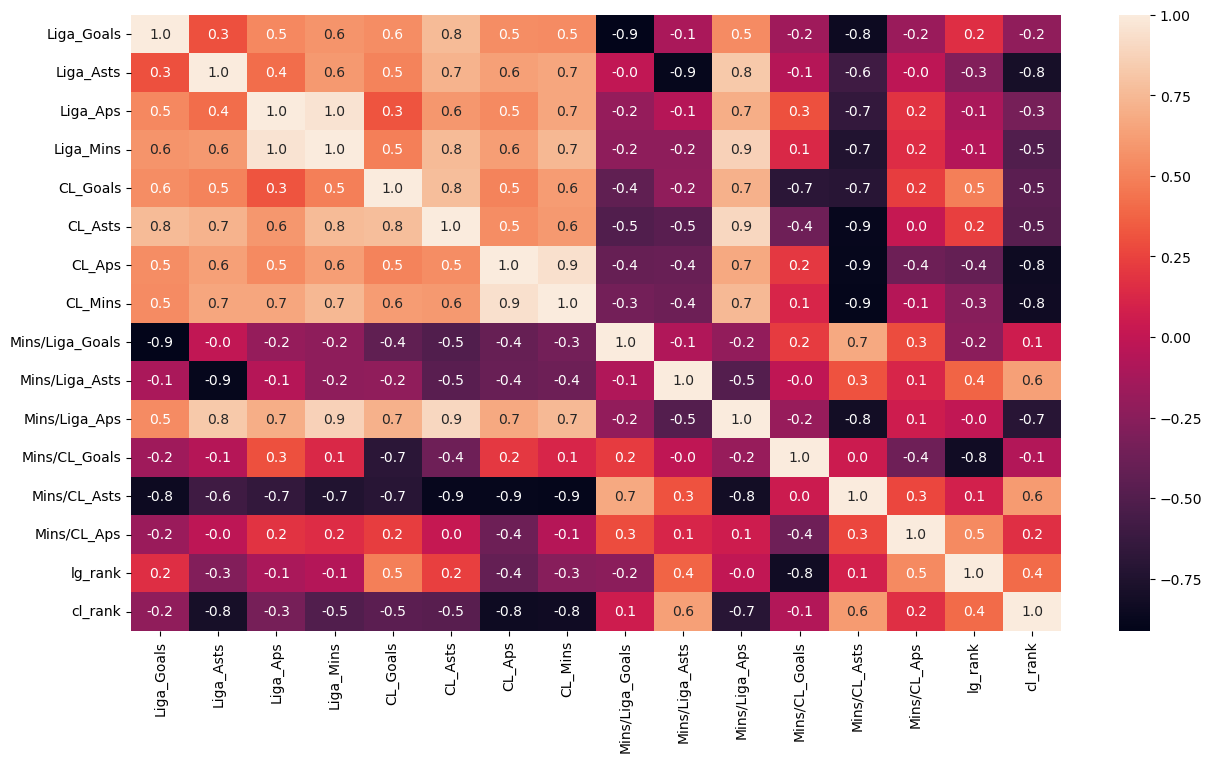

In [55]:

plt.figure(figsize=(15, 8))
sns.heatmap(df_messi.corr(), annot=True, fmt='1.1f')



<AxesSubplot:>

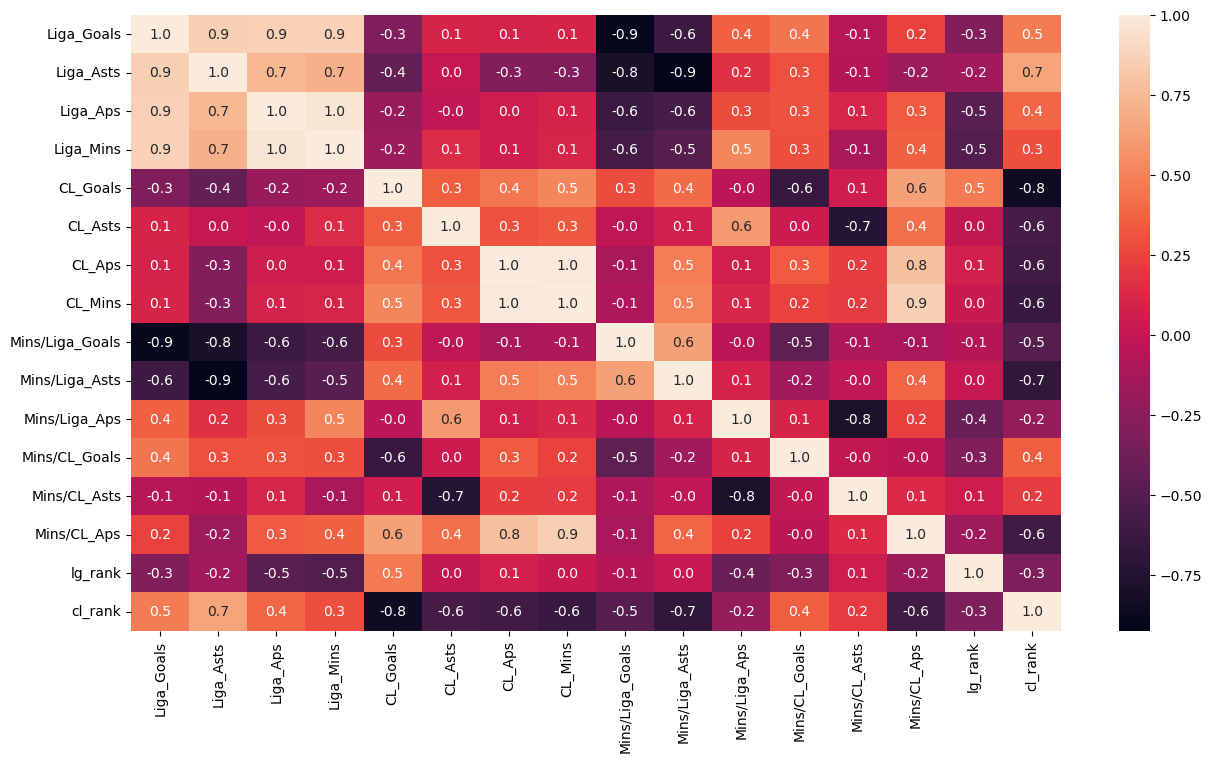

In [56]:

plt.figure(figsize=(15, 8))
sns.heatmap(df_ronaldo.corr(), annot=True, fmt='1.1f')

<Figure size 1500x800 with 0 Axes>

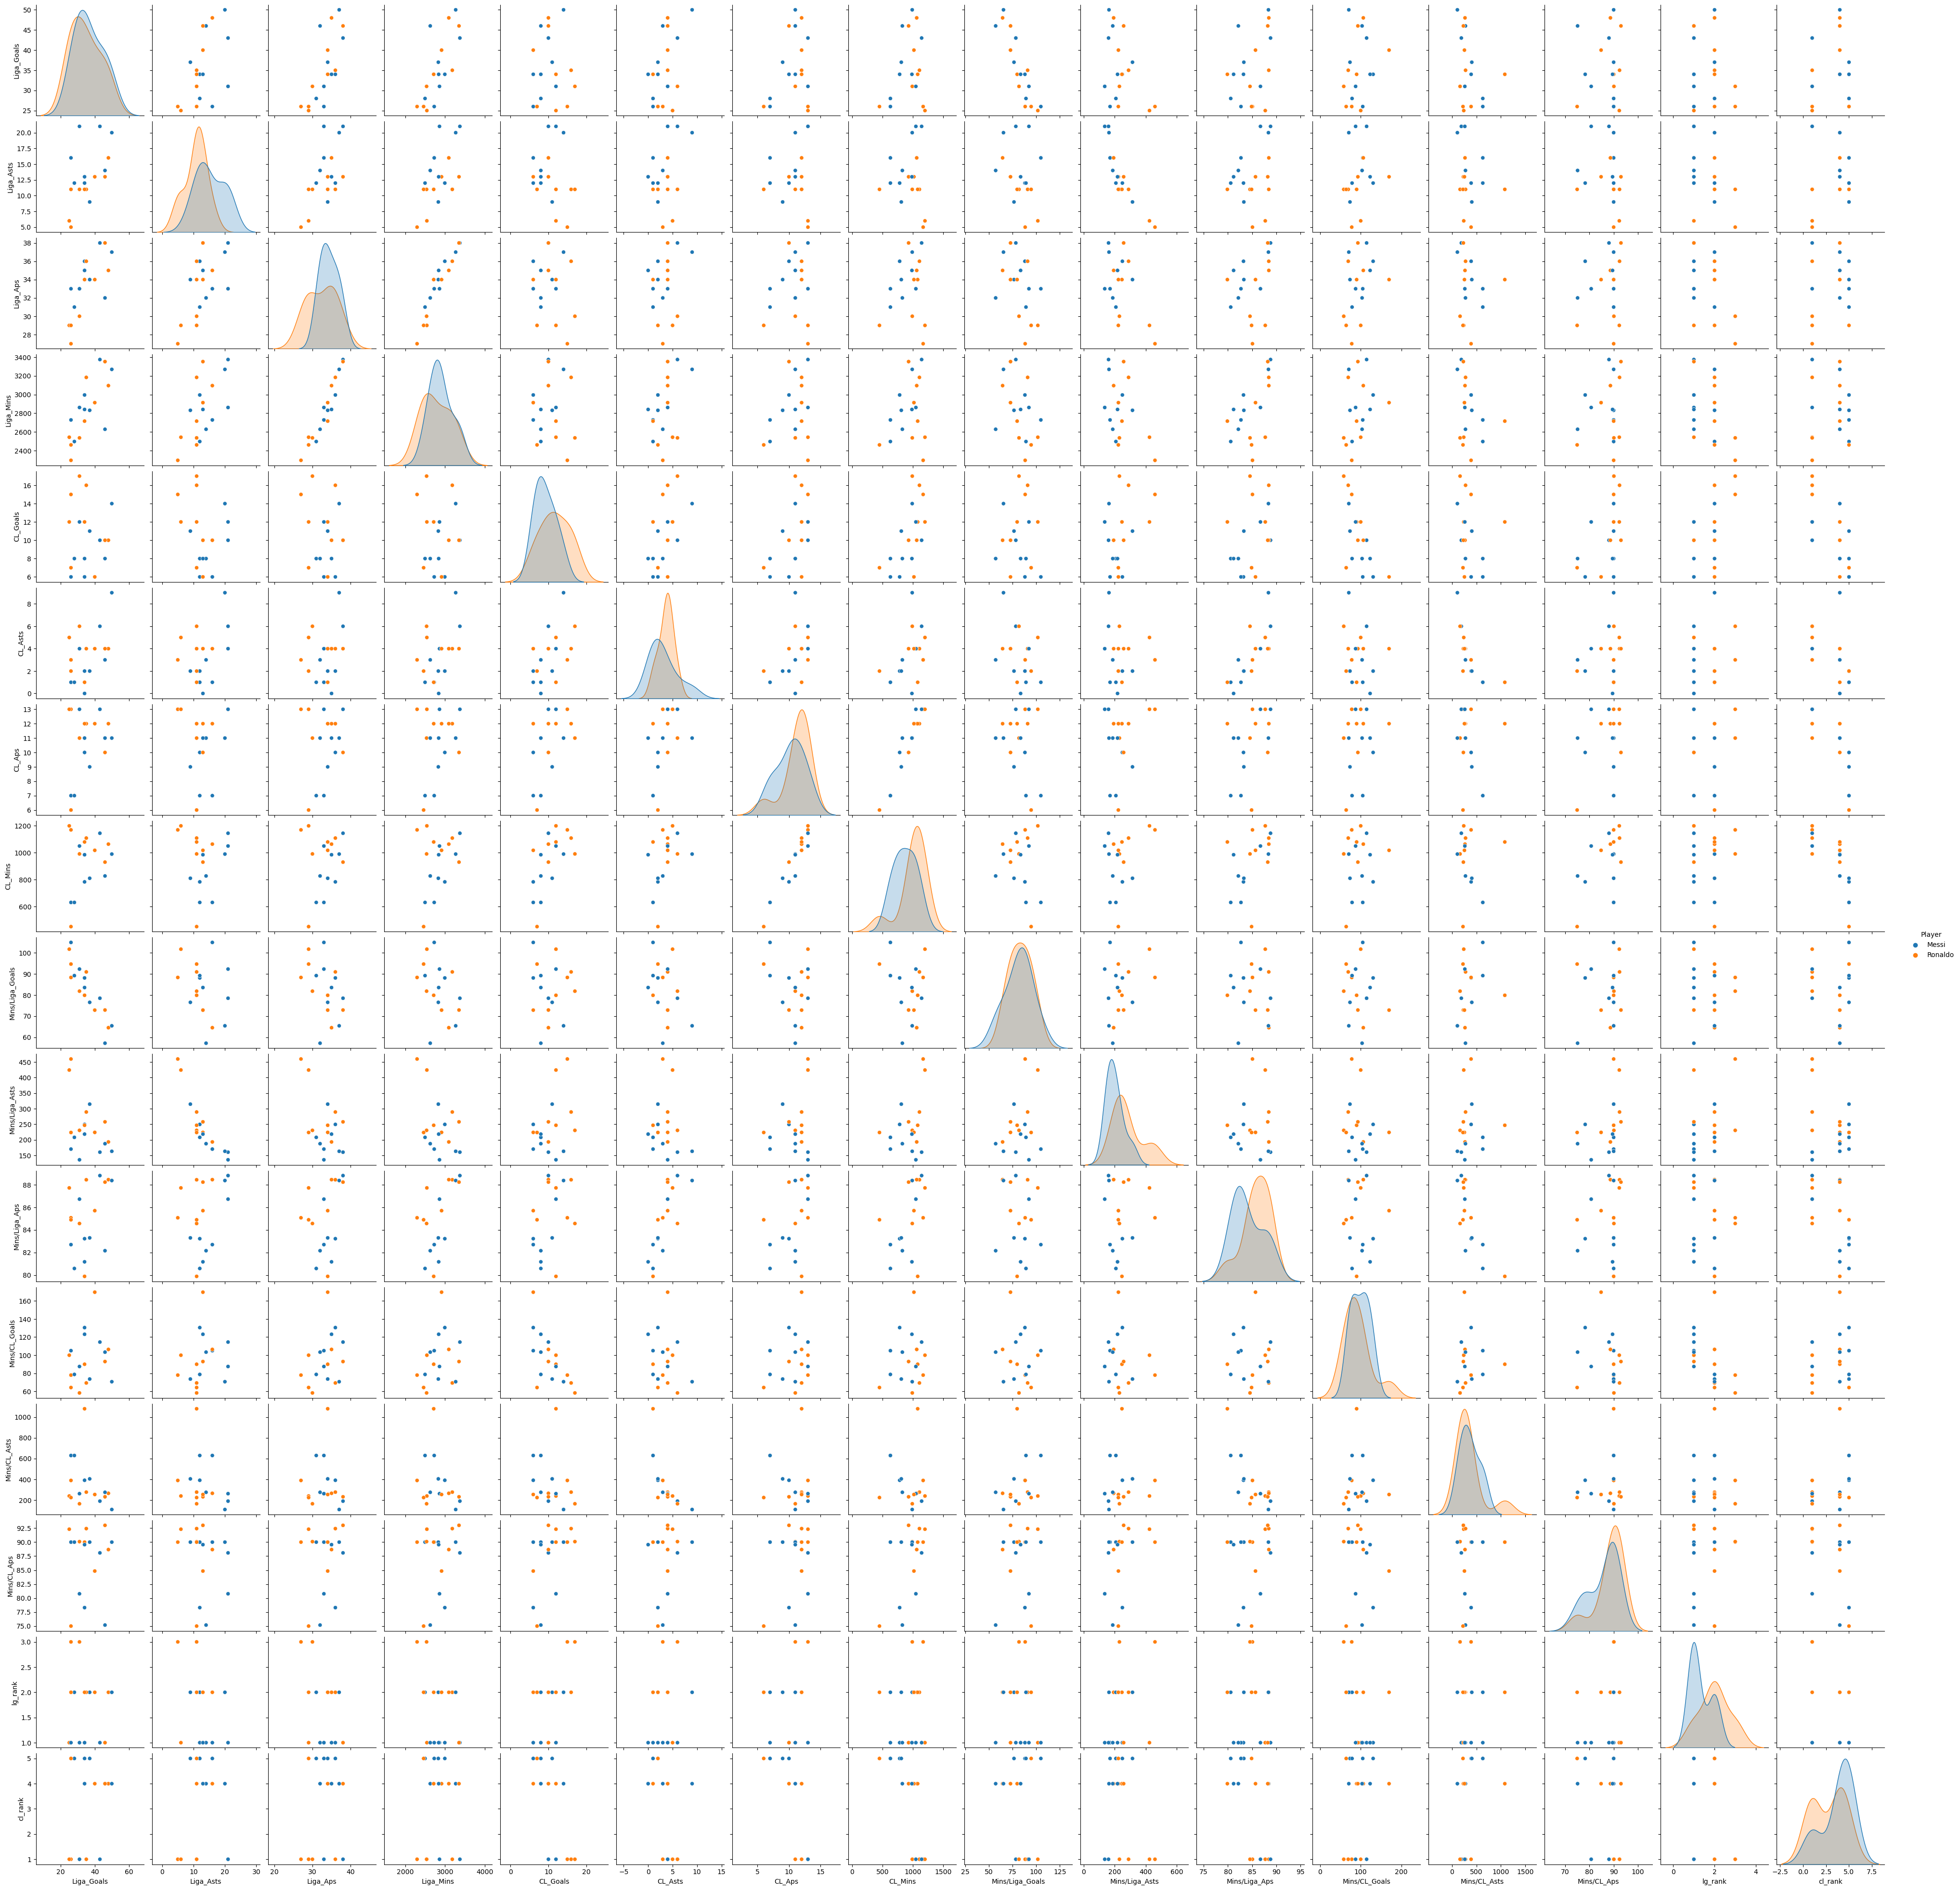

In [57]:
plt.figure(figsize=(15,8))
sns.pairplot(leocr,hue='Player')

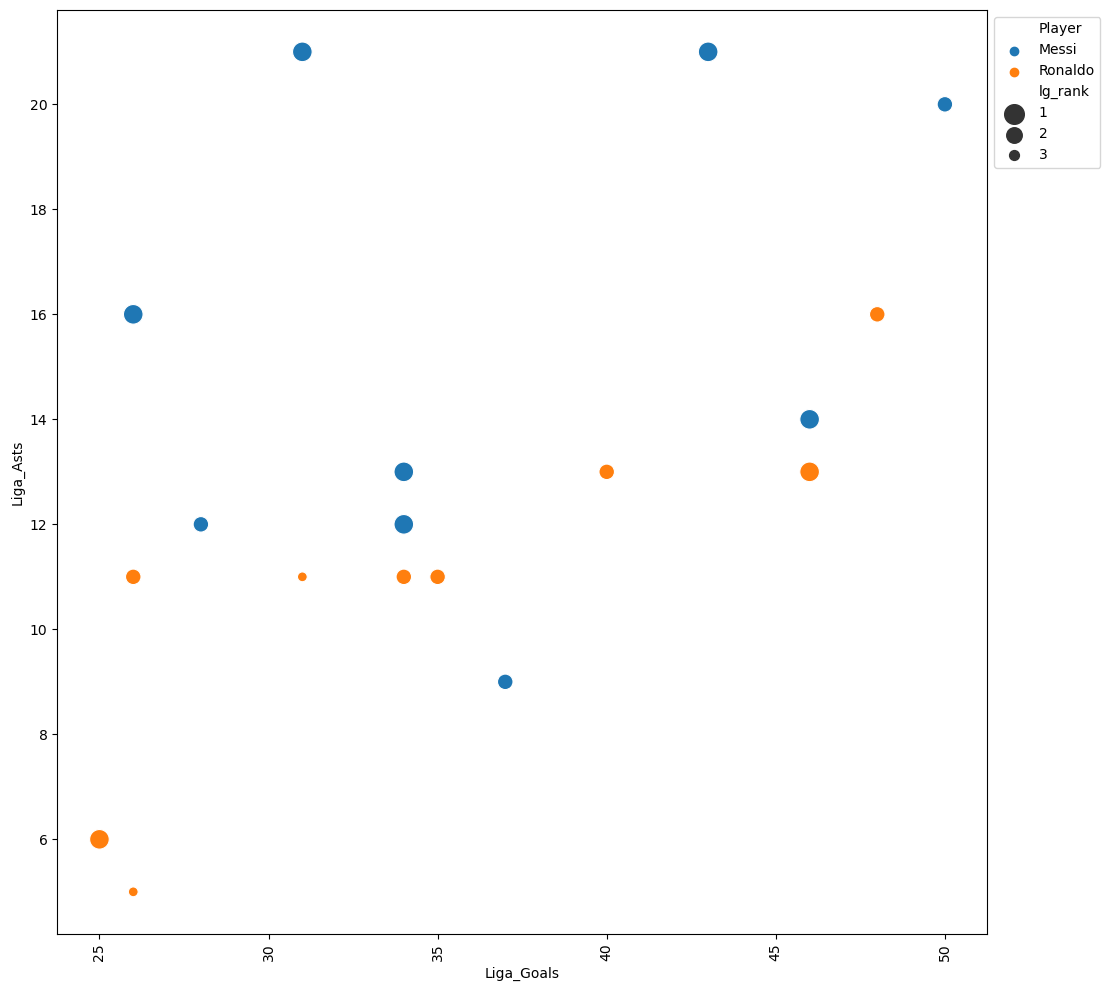

In [63]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(y=leocr['Liga_Asts'], x=leocr['Liga_Goals'], hue=leocr['Player'], size=leocr['lg_rank'], sizes=(200, 50))
plt.xticks(rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

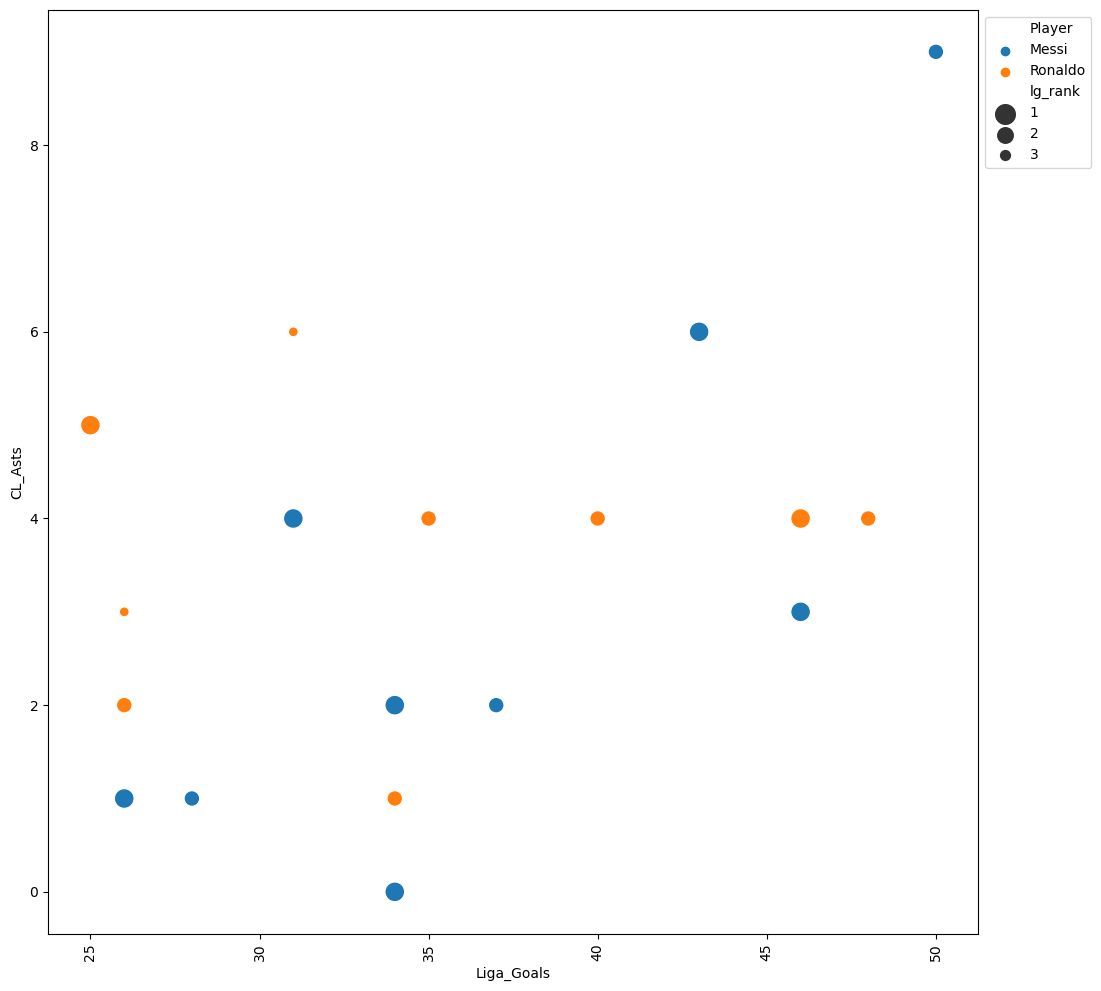

In [64]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(y=leocr['CL_Asts'], x=leocr['Liga_Goals'], hue=leocr['Player'], size=leocr['lg_rank'], sizes=(200, 50))
plt.xticks(rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.tick_params(labelsize=10)
plt.show()